In [1]:
import os

os.environ["SEED"] = "0"

import cocoex
import cocopp
import matplotlib.pyplot as plt
import numpy as np
import scipy

from src.aac.AAC import AAC
from src.constant import DATA_DIR, DATABASE_DIR, MAIN_DIR, SEED
from src.database import DB
from src.database.queries import get_model_training_data, get_solvers_count
from src.experiment import parhydra
from src.instance.TSP_Instance import TSP_from_index_file, set_n22_cut_off_time
from src.log import logger
from src.solver.Portfolio import Portfolio
from src.solver.TSP_LKH_Solver import TSP_LKH_Solver
from src.surrogate.SurrogatePolicy import (
    EvaluationSurrogatePolicyA,
    EvaluationSurrogatePolicyB,
    EvaluationSurrogatePolicyC,
    IterationSurrogatePolicyA,
    IterationSurrogatePolicyB,
    SurrogatePolicy,
    TestSurrogatePolicy,
)
from src.surrogate.wrapper import EmptyWrapper, SurvivalFunctionWrapper

In [2]:
suite = cocoex.Suite("bbob", "", "function_indices:1 dimensions:2 instance_indices:1-15")

fmin = scipy.optimize.fmin

In [3]:
suite

Suite(b'bbob', b'', b'function_indices:1 dimensions:2 instance_indices:1-15')

In [4]:
len(list(suite))
# 6 dimensions X 24 functions X 15 instances = 2160 problems

15

In [5]:
problem = suite[0]
problem.info

'bbob_f001_i01_d02: a 2-dimensional single-objective problem (problem 0 of suite "b\'bbob\'" with name "BBOB suite problem f1 instance 1 in 2D")'

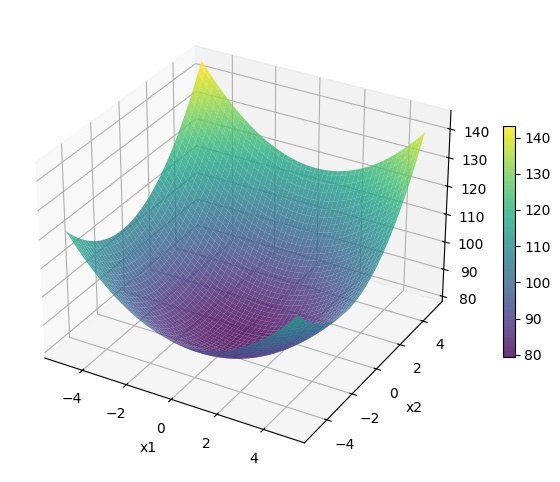

In [6]:
x_range = np.linspace(-5, 5, 100)
y_range = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x_range, y_range)

Z = np.zeros_like(X)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        point = [X[i, j], Y[i, j]]
        Z[i, j] = problem(point)

fig, ax = plt.subplots(figsize=(8, 6), subplot_kw={"projection": "3d"})
surf = ax.plot_surface(X, Y, Z, cmap="viridis", alpha=0.8)
ax.set_xlabel("x1")
ax.set_ylabel("x2")
plt.colorbar(surf, ax=ax, shrink=0.5)
plt.show()

In [7]:
problem = suite[0]

In [8]:
problem.evaluations

0

In [9]:
problem.final_target_hit

False

In [10]:
fmin(problem, problem.initial_solution, disp=True)

Optimization terminated successfully.
         Current function value: 79.480000
         Iterations: 65
         Function evaluations: 124


array([ 0.25281244, -1.15682905])

In [11]:
problem.evaluations

124

In [12]:
problem.final_target_hit

True

In [13]:
suite = cocoex.Suite("bbob", "", "function_indices:1 dimensions:2 instance_indices:1-15")


for problem in suite:
    xopt = fmin(problem, problem.initial_solution, disp=True)
    print(problem.final_target_hit)

Optimization terminated successfully.
         Current function value: 79.480000
         Iterations: 65
         Function evaluations: 124
True
Optimization terminated successfully.
         Current function value: 394.480000
         Iterations: 71
         Function evaluations: 138
True
Optimization terminated successfully.
         Current function value: -247.110000
         Iterations: 71
         Function evaluations: 139
True
Optimization terminated successfully.
         Current function value: -152.040000
         Iterations: 72
         Function evaluations: 141
True
Optimization terminated successfully.
         Current function value: -25.250000
         Iterations: 58
         Function evaluations: 114
True
Optimization terminated successfully.
         Current function value: 183.010000
         Iterations: 78
         Function evaluations: 149
True
Optimization terminated successfully.
         Current function value: 183.520000
         Iterations: 71
         Function